In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from model import *
from utils import *
from config import *


In [27]:
train_loader, _,_ = create_dataloaders(
        npz_path="datasets/seq/seq_train.npz",
        batch_size=16,
        val_ratio=0,
        test_ratio=0
    )
val_loader, test_loader,_ = create_dataloaders(
        npz_path="datasets/seq/seq_validation.npz",
        batch_size=16,
        val_ratio=0.3,
        test_ratio=0
    )

train_loader,val_loader, test_loader= create_dataloaders(
        npz_path="datasets/seq/seq_gesture.npz",
        batch_size=16,
        val_ratio=0.3,
        test_ratio=0.1
    )

Dataset loaded. Total samples: 1186
Feature shape: (1186, 13, 99), Number of label classes: 5

Dataset split:
Training set: 1186 samples
Validation set: 0 samples
Test set: 0 samples
Dataset loaded. Total samples: 582
Feature shape: (582, 13, 99), Number of label classes: 5

Dataset split:
Training set: 408 samples
Validation set: 174 samples
Test set: 0 samples


In [28]:
# 3. 初始化模型
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTMClassifier(input_size=99, hidden_size=64, num_layers=2, num_classes=5).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [29]:
history = train(model, train_loader, val_loader, criterion, optimizer, device, epochs=50)


Epoch 1/50: Train Loss: 1.0974, Train Acc: 0.5936 | Val Loss: 0.9477, Val Acc: 0.6150
Epoch 2/50: Train Loss: 0.3574, Train Acc: 0.8836 | Val Loss: 0.7858, Val Acc: 0.7625
Epoch 3/50: Train Loss: 0.1549, Train Acc: 0.9562 | Val Loss: 0.7448, Val Acc: 0.7700
Epoch 4/50: Train Loss: 0.0856, Train Acc: 0.9722 | Val Loss: 0.7552, Val Acc: 0.7875
Epoch 5/50: Train Loss: 0.0772, Train Acc: 0.9705 | Val Loss: 0.8894, Val Acc: 0.7800
Epoch 6/50: Train Loss: 0.0490, Train Acc: 0.9840 | Val Loss: 1.2249, Val Acc: 0.7050
Epoch 7/50: Train Loss: 0.0314, Train Acc: 0.9907 | Val Loss: 1.1790, Val Acc: 0.7625
Epoch 8/50: Train Loss: 0.0555, Train Acc: 0.9840 | Val Loss: 0.9989, Val Acc: 0.7650
Epoch 9/50: Train Loss: 0.0363, Train Acc: 0.9890 | Val Loss: 0.9989, Val Acc: 0.7700
Epoch 10/50: Train Loss: 0.0042, Train Acc: 0.9983 | Val Loss: 1.1448, Val Acc: 0.7600
Epoch 11/50: Train Loss: 0.0016, Train Acc: 0.9983 | Val Loss: 1.1597, Val Acc: 0.7775
Epoch 12/50: Train Loss: 0.0011, Train Acc: 0.9983 |

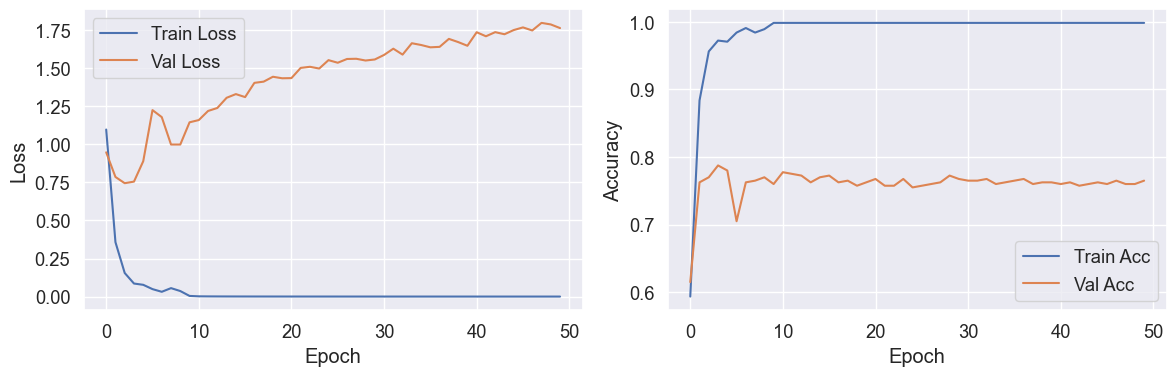

In [30]:
 # 5. 可视化训练曲线
plot_history(history)

In [34]:
test_result = evaluate(model, val_loader,criterion, device)
test_true ,test_pred = test_result['y_true'],test_result['y_pred']
class_names =ACTIONS

Confusion matrix saved to confusion_matrix_raw_13.png


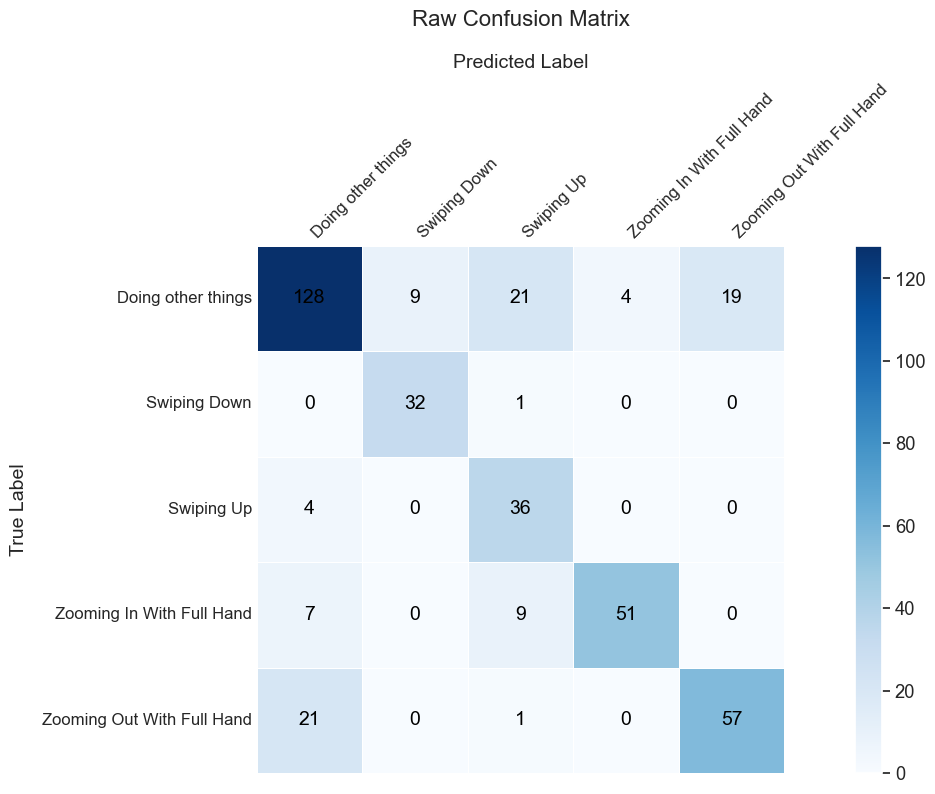

In [35]:

plot_confusion_matrix(test_true, test_pred, 
                     classes=class_names,
                     title='Raw Confusion Matrix',
                     save_path='confusion_matrix_raw_13.png')



Confusion matrix saved to confusion_matrix_norm_13.png


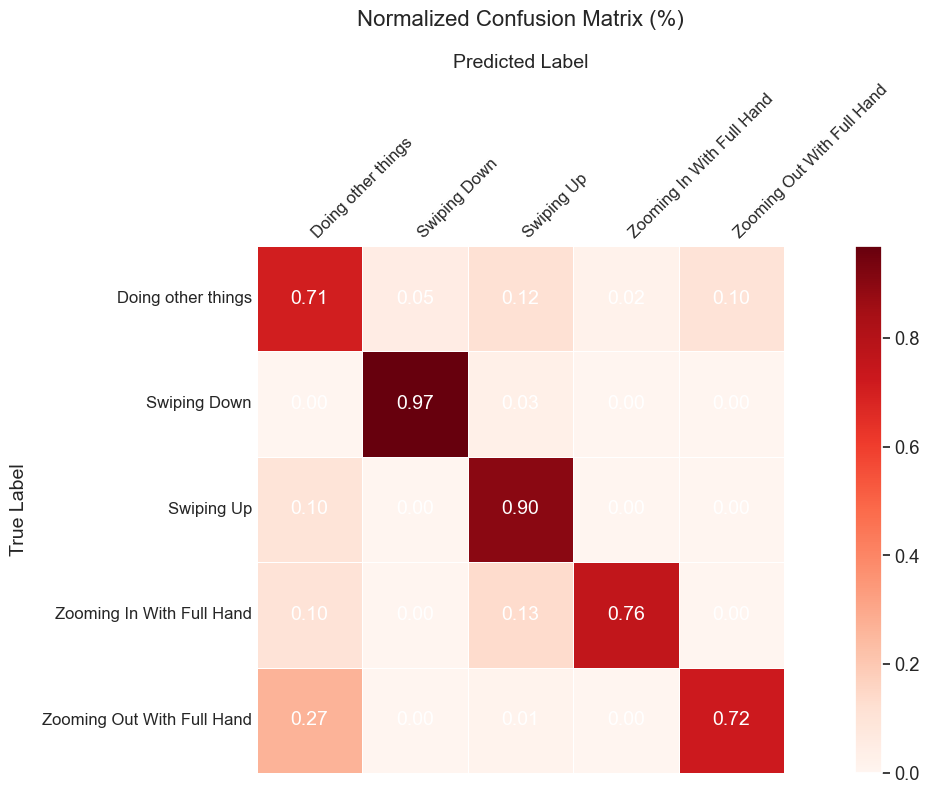

In [36]:
# 2. 归一化百分比矩阵
plot_confusion_matrix(test_true, test_pred, 
                     classes=class_names, normalize=True,
                     title='Normalized Confusion Matrix (%)',
                     cmap=plt.cm.Reds,
                     save_path='confusion_matrix_norm_13.png')

In [14]:
torch.save({
    'model_state_dict': model.state_dict(),
    'history': history
}, 'lstm_model.pth')